In [100]:
# import libraries

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load fantasy team dataset
f = open('Xy.pkl', 'rb')
X=pickle.load(f)
y=pickle.load(f)
f.close()

In [5]:
X.shape

(1000, 314)

In [4]:
y.shape

(1000,)

## Support Vector Machine Classification

In [9]:
X_sv = X  
y_sv = y
X_sv_train, X_sv_test, y_sv_train, y_sv_test = train_test_split(X_sv, y_sv, test_size=0.20) 

In [10]:
# using SVC linear parameter
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_sv_train, y_sv_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
y_sv_pred = svclassifier.predict(X_sv_test)

In [12]:
print(confusion_matrix(y_sv_test, y_sv_pred))  

[[134   6]
 [ 15  45]]


In [13]:
print(classification_report(y_sv_test, y_sv_pred)) 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       140
           1       0.88      0.75      0.81        60

   micro avg       0.90      0.90      0.90       200
   macro avg       0.89      0.85      0.87       200
weighted avg       0.89      0.90      0.89       200



In [41]:
# calculate accuracy

print('Accuracy:' + str(metrics.accuracy_score(y_sv_test, y_sv_pred)))
print('F1: ' + str(metrics.f1_score(y_sv_test, y_sv_pred)))

Accuracy:0.895
F1: 0.8108108108108107


## KNN classifier

In [73]:
X_knn = X 
y_knn = y

In [74]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, random_state=1)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.fit(X_knn_train, y_knn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
y_knn_pred = knn.predict(X_knn_test)

In [21]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_knn_test, y_knn_pred)))
print('F1: ' + str(metrics.f1_score(y_knn_test, y_knn_pred)))

Accuracy:0.784
F1: 0.644736842105263


In [22]:
print(classification_report(y_knn_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       161
           1       0.78      0.55      0.64        89

   micro avg       0.78      0.78      0.78       250
   macro avg       0.78      0.73      0.74       250
weighted avg       0.78      0.78      0.77       250



In [77]:
#F1 score not optimal, going to find optimal k
k_range = list(range(1, 15))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_knn_train, y_knn_train)
    y_knn_predict = knn.predict(X_knn_test)
    score = metrics.f1_score(y_knn_test, y_knn_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.7739013173564925, 0.7112043010752689, 0.773595281306715, 0.7598636363636364, 0.7967223587223587, 0.7718823529411765, 0.7724481009186891, 0.7806561085972851, 0.8041520006191472, 0.7820642165105294, 0.8051922604422603, 0.7718823529411765, 0.7896218291512408, 0.7791860370279747]


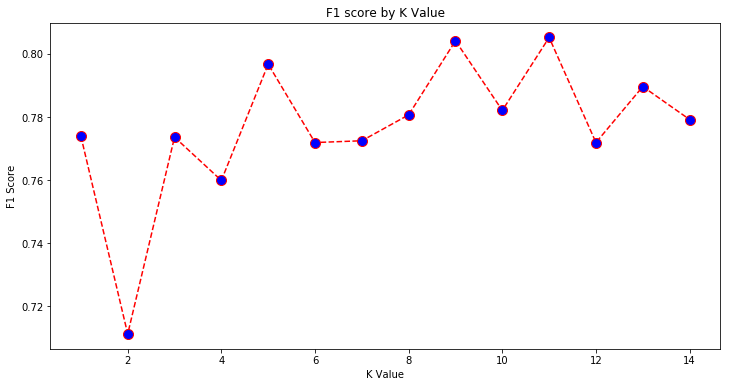

In [78]:
#graph of fl score vs knn
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

In [79]:
#re-running KNN with K=11
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X_knn_train, y_knn_train)
y_knn_pred = knn11.predict(X_knn_test)
print(classification_report(y_knn_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       161
           1       0.86      0.57      0.69        89

   micro avg       0.82      0.82      0.82       250
   macro avg       0.83      0.76      0.78       250
weighted avg       0.82      0.82      0.81       250



In [80]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_knn_test, y_knn_pred)))
print('F1: ' + str(metrics.f1_score(y_knn_test, y_knn_pred)))

Accuracy:0.816
F1: 0.6891891891891891


In [92]:
print(confusion_matrix(y_knn_test, y_knn_pred))  

[[153   8]
 [ 38  51]]


## Decision Tree Classifier

In [30]:
clf_DT = DecisionTreeClassifier()

In [31]:
X_dt = X 
y_dt = y

In [32]:
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt)

In [33]:
clf_DT.fit(X_dt_train, y_dt_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
y_hat = clf_DT.predict(X_dt_test)

print('Test Accuracy score: ', metrics.accuracy_score(y_dt_test, y_hat))
print('Test F1 score: ', metrics.f1_score(y_dt_test, y_hat))


Test Accuracy score:  0.804
Test F1 score:  0.6711409395973154


In [94]:
print(confusion_matrix(y_dt_test, y_hat)) 

[[116  48]
 [ 59  27]]


## Random Forest Classifier

In [35]:
clf = RandomForestClassifier()

In [37]:
X_rf = X 
y_rf = y

In [38]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.20, random_state=23)

In [39]:
clf.fit(X_rf_train, y_rf_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
clf_pred = clf.predict(X_rf_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_rf_test, clf_pred))
print('Test F1 score: ', metrics.f1_score(y_rf_test, clf_pred))

Test Accuracy score:  0.84
Test F1 score:  0.7714285714285714


In [95]:
print(confusion_matrix(y_rf_test, clf_pred))  

[[114   3]
 [ 29  54]]


## Randomized Search CV

In [59]:
# Number of trees in random forest tree
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [62]:
X_rf = X  
y_rf = y

In [63]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf)

In [70]:
# Use the random grid to search for best hyperparameters
# Create base model to tune
clf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_rf_train, y_rf_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [97]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [99]:
rf_random.best_score_

0.9973333333333333

In [ ]:
#re-running RF with best parameters

In [120]:
clf = RandomForestClassifier(n_estimators=800,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features='auto',
                             max_depth=100,
                             bootstrap=True)

In [121]:
X_rf = X 
y_rf = y

In [128]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, random_state=42)

In [129]:
clf.fit(X_rf_train, y_rf_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [130]:
clf_pred = clf.predict(X_rf_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_rf_test, clf_pred))
print('Test F1 score: ', metrics.f1_score(y_rf_test, clf_pred))

Test Accuracy score:  0.92
Test F1 score:  0.846153846153846


In [131]:
print(confusion_matrix(y_rf_test, clf_pred))  

[[175   3]
 [ 17  55]]


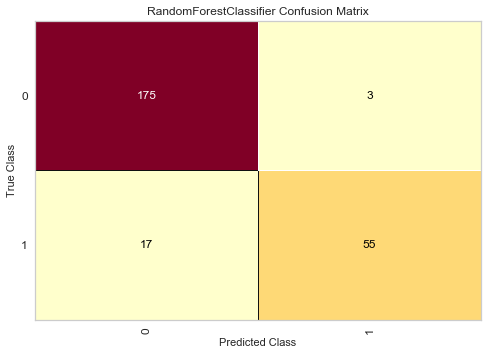

In [132]:
cm = ConfusionMatrix(clf)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_rf_test, y_rf_test)

# How did we do?
cm.poof()

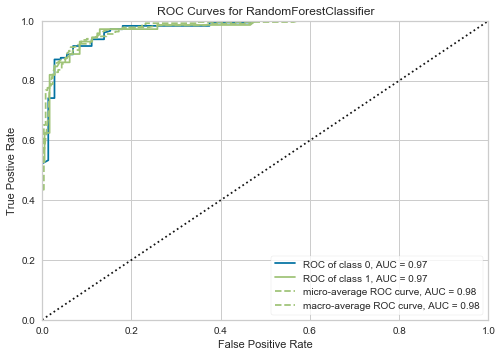

In [133]:
visualizer = ROCAUC(clf)

visualizer.score(X_rf_test, y_rf_test)  # Evaluate the model on the test data

visualizer.poof() 